In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [10]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [42]:
df.rename(columns = {'yrs.since.phd':'yrs_since_phd','yrs.service':'yrs_service'},inplace = True)
df.head()

,rank,discipline,yrs_since_phd,yrs_service,sex,salary
0,2.0,1,19,18,1,139750
1,2.0,1,20,16,1,173200
2,0.0,1,4,3,1,79750
3,2.0,1,45,39,1,115000
4,2.0,1,40,41,1,141500


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [19]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [20]:
df.shape

(397, 6)

In [21]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [22]:
print(df['rank'].unique())
print(df['sex'].unique())
print(df['discipline'].unique())

['Prof' 'AsstProf' 'AssocProf']
['Male' 'Female']
['B' 'A']


In [25]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc=OrdinalEncoder(categories = [['AsstProf','AssocProf','Prof']])
df['rank']=ord_enc.fit_transform(df[['rank']])

In [28]:
df[['sex','discipline']]=pd.get_dummies(df[['sex','discipline']],drop_first=True)

In [29]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1,19,18,1,139750
1,2.0,1,20,16,1,173200
2,0.0,1,4,3,1,79750
3,2.0,1,45,39,1,115000
4,2.0,1,40,41,1,141500


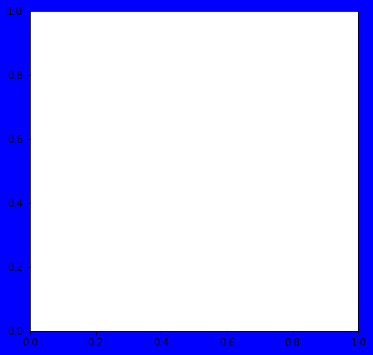

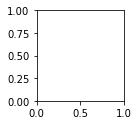

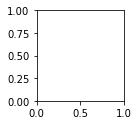

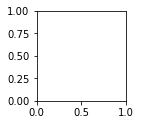

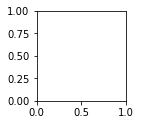

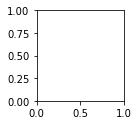

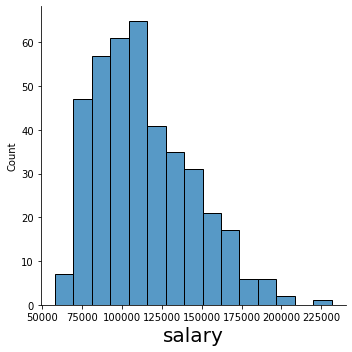

In [43]:
plt.figure(figsize=(20,20),facecolor = 'Blue')
plotnumber = 1

for column in df:
    if plotnumber<=6:
        ax= plt.subplot(3,3,plotnumber)
        sns.displot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

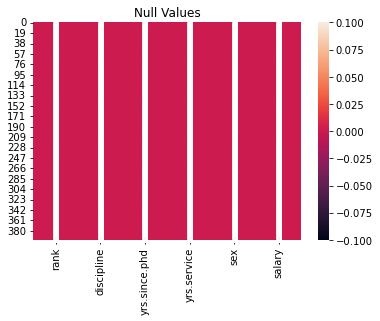

In [39]:

sns.heatmap(df.isnull() , annot =True)
plt.title('Null Values')
plt.show()

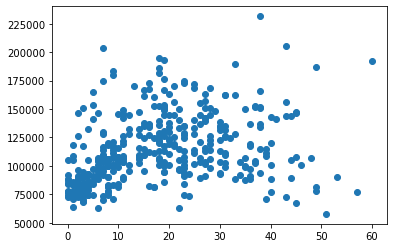

In [44]:
plt.scatter(df.yrs_service,df.salary)
plt.show()

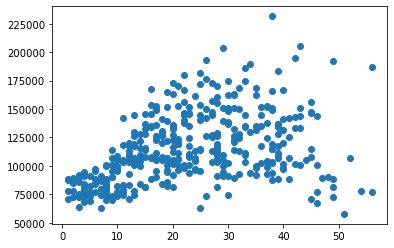

In [45]:
plt.scatter(df.yrs_since_phd,df.salary)
plt.show()

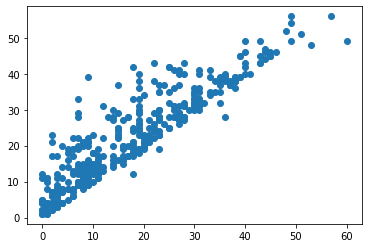

In [46]:
plt.scatter(df.yrs_service,df.yrs_since_phd)
plt.show()

In [47]:
x = df.drop(columns = ['salary'])
y = df['salary']

In [48]:
x.skew().sort_values(ascending = False)

yrs_service      0.650569
yrs_since_phd    0.300880
discipline      -0.177684
rank            -1.132759
sex             -2.709958
dtype: float64

In [49]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)

In [50]:
pd.DataFrame(x_new,columns = x.columns).skew().sort_values(ascending =False)


yrs_service     -0.122152
yrs_since_phd   -0.132757
discipline      -0.177684
rank            -0.831964
sex             -2.709958
dtype: float64

In [51]:
x = pd.DataFrame(x_new,columns = x.columns)


In [52]:
x.head()

,rank,discipline,yrs_since_phd,yrs_service,sex
0,0.689756,0.915403,-0.127295,0.250619,0.330058
1,0.689756,0.915403,-0.049178,0.105112,0.330058
2,-1.714047,0.915403,-1.628121,-1.288032,0.330058
3,0.689756,0.915403,1.565162,1.416860,0.330058
4,0.689756,0.915403,1.279680,1.506524,0.330058


In [53]:
x.skew()[np.abs(x.skew())<0.20].all()

True

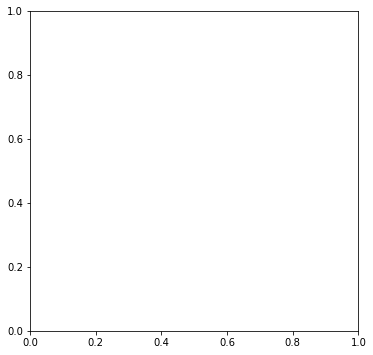

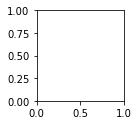

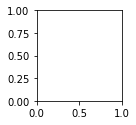

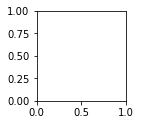

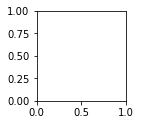

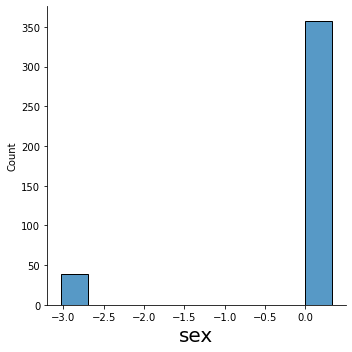

In [55]:
plt.figure(figsize = (20,20))
plotnumber = 1

for column in x:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.displot(x[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [56]:
from scipy.stats import zscore
(np.abs(zscore(x))<3).all()

rank              True
discipline        True
yrs_since_phd     True
yrs_service       True
sex              False
dtype: bool

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [60]:
scaler = StandardScaler()
x_scaled=scaler.fit_transform(x)

In [63]:
max_r2_score = 0
maxRs = 0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    y_pred=LR.predict(x_test)
    r2_score=LR.score(x_test,y_test)
    print('r2_score',r2_score*100,'%', 'random_state', i)
    

r2_score 48.865070618151385 % random_state 1
r2_score 40.13572878704622 % random_state 2
r2_score 41.99099849902876 % random_state 3
r2_score 40.07571821082194 % random_state 4
r2_score 34.151054115199145 % random_state 5
r2_score 43.76802749646895 % random_state 6
r2_score 51.171126214112974 % random_state 7
r2_score 34.1933508973104 % random_state 8
r2_score 40.10017262162147 % random_state 9
r2_score 40.94739565803272 % random_state 10
r2_score 37.72188639833555 % random_state 11
r2_score 42.6362911600111 % random_state 12
r2_score 39.94645589104388 % random_state 13
r2_score 22.6571529163502 % random_state 14
r2_score 40.75892371098239 % random_state 15
r2_score 43.096849354411425 % random_state 16
r2_score 42.13995012557001 % random_state 17
r2_score 45.544345104104934 % random_state 18
r2_score 52.83550053994732 % random_state 19
r2_score 51.71217360561457 % random_state 20
r2_score 45.44786997011509 % random_state 21
r2_score 43.474449471405805 % random_state 22
r2_score 32.0383

In [64]:
print('Best r2 Score is', max_r2_score, 'on Ramdom_state', maxRs)

Best r2 Score is 0 on Ramdom_state 0


In [65]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y , test_size = 0.25, random_state = 80)


In [67]:
LR= LinearRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)

In [68]:
LR.score(x_test, y_test)

0.5800438430902028

In [69]:
mean_squared_error(y_test, y_pred)

284368650.1732358

In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('Mean Absolute Error: ',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test,y_pred))
print('Square Root of Mean Sqaure Error: ', np.sqrt(mean_squared_error(y_test,y_pred)))

Mean Absolute Error:  12912.008537582313
Mean Squared Error:  284368650.1732358
Square Root of Mean Sqaure Error:  16863.233680799058


In [72]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [73]:
lasscv= LassoCV(alphas= None,max_iter=100,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [74]:
alpha = lasscv.alpha_
alpha

45.43019646737714

In [75]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=45.43019646737714)

In [76]:
lasso_reg.score(x_test,y_test)


0.5789527488957673

In [78]:
ridgecv=RidgeCV(alphas = np.arange(0.001,2,0.01),normalize =True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([1.000e-03, 1.100e-02, 2.100e-02, 3.100e-02, 4.100e-02, 5.100e-02,
       6.100e-02, 7.100e-02, 8.100e-02, 9.100e-02, 1.010e-01, 1.110e-01,
       1.210e-01, 1.310e-01, 1.410e-01, 1.510e-01, 1.610e-01, 1.710e-01,
       1.810e-01, 1.910e-01, 2.010e-01, 2.110e-01, 2.210e-01, 2.310e-01,
       2.410e-01, 2.510e-01, 2.610e-01, 2.710e-01, 2.810e-01, 2.910e-01,
       3.010e-01, 3.110e-01, 3.210e-0...
       1.621e+00, 1.631e+00, 1.641e+00, 1.651e+00, 1.661e+00, 1.671e+00,
       1.681e+00, 1.691e+00, 1.701e+00, 1.711e+00, 1.721e+00, 1.731e+00,
       1.741e+00, 1.751e+00, 1.761e+00, 1.771e+00, 1.781e+00, 1.791e+00,
       1.801e+00, 1.811e+00, 1.821e+00, 1.831e+00, 1.841e+00, 1.851e+00,
       1.861e+00, 1.871e+00, 1.881e+00, 1.891e+00, 1.901e+00, 1.911e+00,
       1.921e+00, 1.931e+00, 1.941e+00, 1.951e+00, 1.961e+00, 1.971e+00,
       1.981e+00, 1.991e+00]),
        normalize=True)

In [79]:
alpha = ridgecv.alpha_
alpha

0.030999999999999996

In [80]:
ridge_model = Ridge(alpha)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.030999999999999996)

In [81]:
ridge_model.score(x_test,y_test)

0.580037790373435

In [87]:
from sklearn import svm
regr = svm.SVR()

param_grid = {'C':[0.001,2,3,4,5,6,7,10], 'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,1],'epsilon':[0.01,0.05,0.075,0.1]}

grd=GridSearchCV(regr, param_grid = param_grid)
grd.fit(x_train,y_train)

print('Best Parameter: ', grd.best_params_)

regr = grd.best_estimator
regr.fit(x_train,y_train)
y_pred=regr.predict(x_test)
print('R2 score: ', regr.score(x_test,y_test))
print('Mean Squared Error: ', mean_squared_error(y_test,y_pred))


Best Parameter:  {'C': 10, 'epsilon': 0.01, 'gamma': 0.2}


AttributeError: 'GridSearchCV' object has no attribute 'best_estimator'

In [88]:
from sklearn import tree

clf = tree.DecisionTreeRegressor()

param_grid = {'criterion':['square_error','absolute_error'],'max_depth':range(10,15),'min_sample_split':range(3,10),'max_leaf_nodes':range(2,4)}

grd=GridSearchCV(clf, param_grid = param_grid)
grd.fit(x_train,y_train)

print('Best Parameter: ', grd.best_params_)

clf = grd.best_estimator
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print('R2 score: ', clf.score(x_test,y_test))
print('Mean Squared Error: ', mean_squared_error(y_test,y_pred))

ValueError: Invalid parameter min_sample_split for estimator DecisionTreeRegressor(criterion='square_error', max_depth=10, max_leaf_nodes=2). Check the list of available parameters with `estimator.get_params().keys()`.

In [90]:
import xgboost as xgb
xgb = xgb.XGBRegressor()

xgb.fit(x_train, y_train)

y_pred=xgb.predict(x_test)
print('R2 Score:',xgb.score(x_test,y_test))
print('Mean Squared Error: ',mean_sqaured_error(y_test,y_pred))

ModuleNotFoundError: No module named 'xgboost'